In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

data = pd.read_csv(url)
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


# Preparing the dataset

In [3]:
data.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [4]:
to_use_cols = [ 'engine_displacement',
                'horsepower',
                'vehicle_weight',
                'model_year',
                'fuel_efficiency_mpg']

df = data[to_use_cols].copy()
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


# EDA

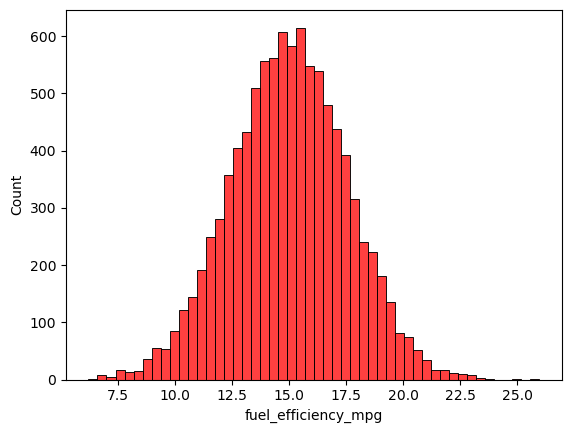

In [9]:
sns.histplot(df.fuel_efficiency_mpg, bins=50, color="red")

plt.show()

### The data doesn't have a long tail. Then no need to use the log-transformation.

## Question 1

In [11]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [17]:
missing_value_col = df.columns[df.isnull().any()][0]
missing_value_col

'horsepower'

### Question 2

In [18]:
df[missing_value_col].median()

149.0

### Question 3

### RMSE (filling the missing values of 'screen' with 0s vs. with the mean value) "without regularization"

In [43]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [44]:
rows_with_missing_values = df_train[df_train.isnull().any(axis=1)]
print(rows_with_missing_values)
indexes_of_rows_with_missing_values = rows_with_missing_values.index.tolist()

      engine_displacement  horsepower  vehicle_weight  model_year
19                    300         NaN     3217.664208        2000
29                    200         NaN     3090.672180        2007
32                    270         NaN     2819.061307        2016
50                    240         NaN     3736.177808        2018
80                    230         NaN     2406.413778        2001
...                   ...         ...             ...         ...
5747                  230         NaN     3640.729992        2016
5753                  230         NaN     3166.382689        2021
5758                  170         NaN     3202.990193        2000
5789                  230         NaN     2925.660208        2012
5815                  220         NaN     3561.727026        2019

[429 rows x 4 columns]


In [48]:
def prepare_X(df):
    df_num = df.copy()
    return df_num.fillna(0).values

X_train = prepare_X(df_train)

print("Rows with missing values after filling them:")
print(X_train[indexes_of_rows_with_missing_values])


Rows with missing values after filling them:
[[ 300.            0.         3217.66420834 2000.        ]
 [ 200.            0.         3090.67218021 2007.        ]
 [ 270.            0.         2819.06130695 2016.        ]
 ...
 [ 170.            0.         3202.99019272 2000.        ]
 [ 230.            0.         2925.66020776 2012.        ]
 [ 220.            0.         3561.72702597 2019.        ]]


In [49]:
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse_with_zero = round(rmse(y_val, y_pred), 2).item()
print(f"\nRMSE: {rmse_with_zero}")


RMSE: 0.52


### 02. filling missing values with the mean

In [50]:
# need to change attributes: X_train_mean, X_val_mean
fuel_efficiency_mpg_mean = df['fuel_efficiency_mpg'].mean()

def prepare_X_mean(df):
    df_num = df.copy()
    return df_num.fillna(fuel_efficiency_mpg_mean).values

X_train_mean = prepare_X_mean(df_train)
print("Rows with missing values after filling them:")
print(X_train_mean[indexes_of_rows_with_missing_values])

Rows with missing values after filling them:
[[ 300.           14.98524323 3217.66420834 2000.        ]
 [ 200.           14.98524323 3090.67218021 2007.        ]
 [ 270.           14.98524323 2819.06130695 2016.        ]
 ...
 [ 170.           14.98524323 3202.99019272 2000.        ]
 [ 230.           14.98524323 2925.66020776 2012.        ]
 [ 220.           14.98524323 3561.72702597 2019.        ]]


In [51]:
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
X_val_mean = prepare_X_mean(df_val)

y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

rmse_with_mean = round(rmse(y_val, y_pred_mean), 2).item()
print(f"\nRMSE: {rmse_with_mean}")


RMSE: 0.51


In [52]:
if rmse_with_zero < rmse_with_mean:
    print("With 0 gives better results.")
elif rmse_with_zero > rmse_with_mean:
    print("With mean gives better results.")   
else:
    print("Both are equally good.")    

With mean gives better results.


### Question 4

In [53]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [54]:
X_train_reg = prepare_X(df_train)
print("Rows with missing values after filling them:")
print(X_train_reg[indexes_of_rows_with_missing_values])

Rows with missing values after filling them:
[[ 300.            0.         3217.66420834 2000.        ]
 [ 200.            0.         3090.67218021 2007.        ]
 [ 270.            0.         2819.06130695 2016.        ]
 ...
 [ 170.            0.         3202.99019272 2000.        ]
 [ 230.            0.         2925.66020776 2012.        ]
 [ 220.            0.         3561.72702597 2019.        ]]


In [55]:
r_used = 0.001

w0_reg, w_reg = train_linear_regression_reg(X_train_reg, y_train, r_used)
X_val_reg = prepare_X(df_val)

y_pred_reg = w0_reg + X_val_reg.dot(w_reg)

rmse_with_reg = round(rmse(y_val, y_pred_reg), 2).item()
print(f"\nRMSE: {rmse_with_mean} For value of r = {r_used}")


RMSE: 0.51 For value of r = 0.001


In [56]:
X_train_reg = prepare_X(df_train)
X_val_reg = prepare_X(df_val)

r_list = [0, 0.01, 0.1, 1,  10, 100]
scores = []

for r in r_list:

    w0_reg, w_reg = train_linear_regression_reg(X_train_reg, y_train, r)
    
    y_pred_reg = w0_reg + X_val_reg.dot(w_reg)
    
    rmse_with_reg = round(rmse(y_val, y_pred_reg), 2).item()

    scores.append(rmse_with_reg)
    print(f"\nRMSE: {rmse_with_reg} For value of r = {r}")

print(f"\nThe smallest RMSE value = {min(scores)}")


RMSE: 0.52 For value of r = 0

RMSE: 0.52 For value of r = 0.01

RMSE: 0.52 For value of r = 0.1

RMSE: 0.52 For value of r = 1

RMSE: 0.52 For value of r = 10

RMSE: 0.52 For value of r = 100

The smallest RMSE value = 0.52


In [57]:
r_num = np.array(r_list)
scores_num = np.array(scores)

scores_df = pd.DataFrame({"r": r_num, "score" : scores_num})
scores_df.loc[scores_df["score"].idxmin()]  

r        0.00
score    0.52
Name: 0, dtype: float64

### Question 5

In [60]:
def prepare_data(df, s):

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']


    return df_train, df_val, df_test, y_train, y_val, y_test

In [63]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores_seed = []

for seed in seeds:
    df_train_seed, df_val_seed, df_test_seed, y_train_seed, y_val_seed, y_test_seed = prepare_data(df, s=seed)
    
    X_train_seed = prepare_X(df_train_seed)
    X_val_seed = prepare_X(df_val_seed)
    
    w0_seed, w_seed = train_linear_regression(X_train_seed, y_train_seed)
    
    y_pred_seed = w0_seed + X_val_seed.dot(w_seed)
    
    rmse_with_diff_seed = rmse(y_val_seed, y_pred_seed)

    scores_seed.append(rmse_with_diff_seed)
    print(f"\nRMSE: {rmse_with_diff_seed}")


RMSE: 0.5206531296282488

RMSE: 0.5213388912852449

RMSE: 0.5228069974790948

RMSE: 0.5159516741126557

RMSE: 0.5109129460051677

RMSE: 0.528340646010539

RMSE: 0.5313910658196378

RMSE: 0.5090670387410288

RMSE: 0.5147399129519309

RMSE: 0.5131865908214442


In [68]:
import math
scores_seed_num = np.array(scores_seed)

math.floor(scores_seed_num.std())

0

### Question 6

In [31]:
df_train_6, df_val_6, df_test_6, y_train_6, y_val_6, y_test_6 = prepare_data(df, s=9)

In [34]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [37]:
df_train_val_full = pd.concat([df_train_6, df_val_6], axis=0)
y_train_val_full = np.concatenate((y_train_6, y_val_6))

df_train_val_full = df_train_val_full.reset_index(drop=True)

X_train_val_full = prepare_X_zeros(df_train_val_full)
X_test = prepare_X_zeros(df_test_6)

w0_6, w_6 = train_linear_regression_reg(X_train_val_full, y_train_val_full, r=0.001)

y_pred_6 = w0_6 + X_test.dot(w_6)

rmse_with_diff_seed = round(rmse(y_test_6, y_pred_6), 4).item()

rmse_with_diff_seed

0.5156